##                                                      STUDENT SCORE PREDICTION PROJECT

In [ ]:
# Import necessary libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns
import pandas as pd

In [18]:
##Generate the synthetic data

In [19]:
np.random.seed(42)
hours = np.random.uniform(1, 10, 100)  
noise = np.random.normal(0, 5, 100)    
scores = 5 * hours + 50 + noise     
# Create DataFrame
data = pd.DataFrame({'Hours': hours, 'Scores': scores})

In [20]:
# Step 2: Data Cleaning

In [21]:
data_cleaned = data.dropna()

In [22]:
data_cleaned

,Hours,Scores
0,4.370861,72.289541
1,9.556429,96.287107
2,7.587945,88.398531
3,6.387926,72.001787
4,2.404168,60.922479
...,...,...
95,5.444160,73.141750
96,5.704595,78.137469
97,4.847869,75.945106
98,1.228772,57.527315


In [23]:
# Step 3: Data Visualization

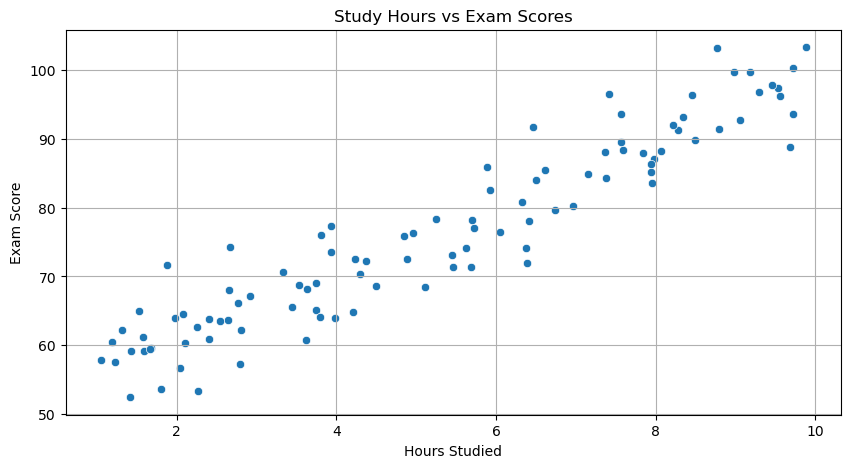

In [5]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data_cleaned, x='Hours', y='Scores')
plt.title("Study Hours vs Exam Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

In [ ]:
# Step 4: Split the dataset

In [24]:
X = data_cleaned[['Hours']]
y = data_cleaned['Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train, X_test, y_train, y_test 

(       Hours
 55  9.296868
 88  8.984915
 26  2.797064
 42  1.309497
 69  9.881982
 ..       ...
 60  4.498096
 71  2.788441
 14  2.636425
 92  7.847065
 51  7.976195
 
 [80 rows x 1 columns],
        Hours
 83  1.572025
 53  9.053446
 70  7.950203
 45  6.962701
 44  3.329020
 39  4.961372
 22  3.629302
 80  8.767931
 10  1.185260
 0   4.370861
 18  4.887505
 30  6.467904
 73  8.339153
 33  9.539970
 90  2.076348
 4   2.404168
 76  7.941433
 77  1.666402
 12  8.491984
 31  2.534717,
 55     96.827155
 88     99.741454
 26     62.271748
 42     62.261598
 69    103.319027
          ...    
 60     68.574212
 71     57.339923
 14     63.667511
 92     88.008387
 51     87.049488
 Name: Scores, Length: 80, dtype: float64,
 83     61.142894
 53     92.749852
 70     83.566261
 45     80.266566
 44     70.600259
 39     76.314599
 22     68.172076
 80    103.168527
 10     60.503313
 0      72.289541
 18     72.476985
 30     91.770448
 73     93.180688
 33     97.327620
 90     64.492042


In [26]:
# Step 5: Train Linear Regression Model

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)
# Predict on test data
y_pred = model.predict(X_test)

In [36]:
y_pred

array([58.44714579, 94.18609057, 88.91586866, 84.1985439 , 66.84035557,
       74.63814689, 68.27481059, 92.82217637, 56.59956063, 71.81725853,
       74.28528097, 81.83488614, 90.77389271, 96.51022698, 60.85631031,
       62.42231292, 88.87397508, 58.89798583, 91.50396999, 63.04595059])

In [29]:
# Step 6: Visualize Predictions

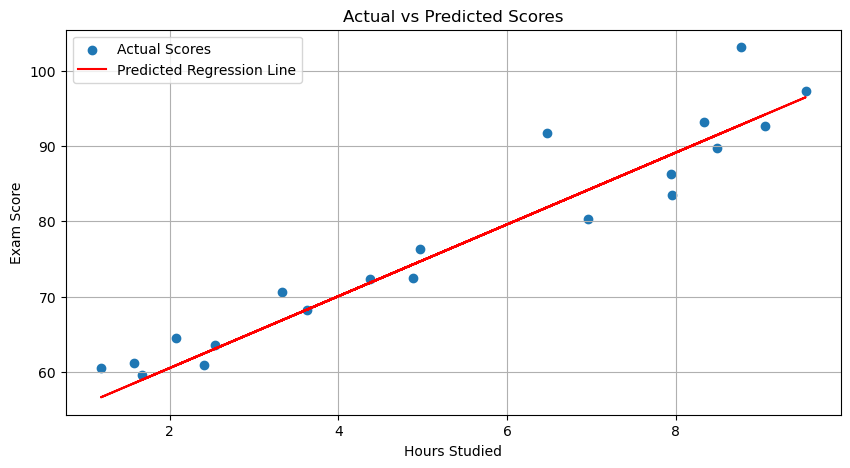

In [37]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, label='Actual Scores')
plt.plot(X_test, y_pred, color='red', label='Predicted Regression Line')
plt.title("Actual vs Predicted Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Step 7: Evaluate Model

In [39]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
(mae, r2, model.coef_[0], model.intercept_)

(2.956712889594886, 0.912026107460129, 4.777026286089195, 50.93754031120364)

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [41]:
# Step 8: Polynomial Regression (degree 2)

In [42]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
# Predict on test data
y_poly_pred = poly_model.predict(X_test)

In [33]:
y_poly_pred

array([59.5958851 , 95.15897147, 88.86289815, 83.53594526, 66.44444115,
       73.63412548, 67.70724271, 93.49467296, 58.21225382, 70.94126494,
       73.2915703 , 80.97645591, 91.04106068, 98.05111245, 61.46724746,
       62.72444322, 88.81430763, 59.94030034, 91.90930703, 63.23404743])

In [34]:
# Step 9: Visualize Polynomial Predictions

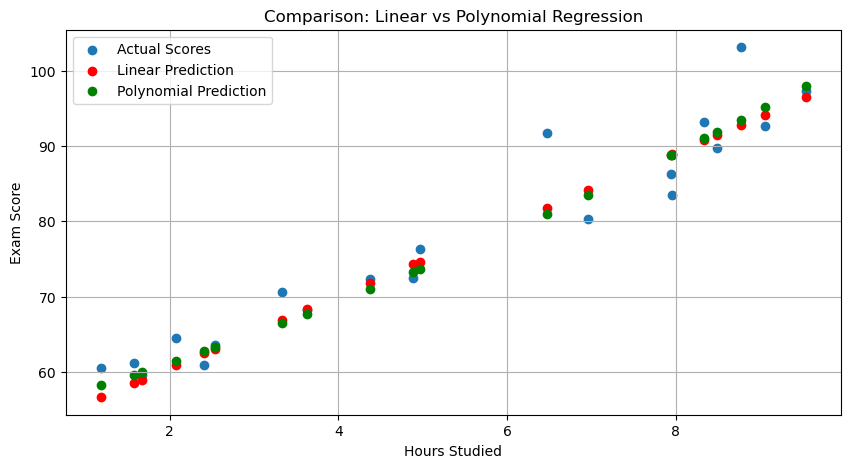

In [43]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, label='Actual Scores')
plt.scatter(X_test, y_pred, color='red', label='Linear Prediction')
plt.scatter(X_test, y_poly_pred, color='green', label='Polynomial Prediction')
plt.title("Comparison: Linear vs Polynomial Regression")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
##Step 10: Compare Performance

In [35]:
linear_mae = mean_absolute_error(y_test, y_pred)
linear_r2 = r2_score(y_test, y_pred)

poly_mae = mean_absolute_error(y_test, y_poly_pred)
poly_r2 = r2_score(y_test, y_poly_pred)

print(f"Linear Regression:    MAE = {linear_mae:.2f}, R² = {linear_r2:.2f}")
print(f"Polynomial Regression: MAE = {poly_mae:.2f}, R² = {poly_r2:.2f}")


Linear Regression:    MAE = 2.96, R² = 0.91
Polynomial Regression: MAE = 2.89, R² = 0.91
